<h1>TAREA 2</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>Estudiar los diferentes espacios de color que tiene OpenCV, utilizando imágenes de su proyecto.</p>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


Listo


(<matplotlib.axes._subplots.AxesSubplot at 0x10da16e10>,
 <matplotlib.text.Text at 0x10cf05b90>)

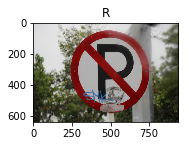

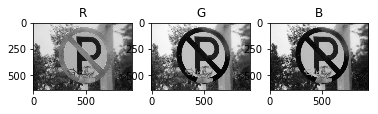

In [11]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division
from scipy.fftpack import fft, fftfreq

img = cv2.imread('Fig/nop.jpg',1)
print "Listo"
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(1)
plt.subplot(221), plt.imshow(imgrgb, cmap=plt.cm.gray), plt.title('R')

plt.figure(2)
plt.subplot(231), plt.imshow(imgrgb[:,:,0], cmap=plt.cm.gray), plt.title('R')
plt.subplot(232), plt.imshow(imgrgb[:,:,1], cmap=plt.cm.gray), plt.title('G')
plt.subplot(233), plt.imshow(imgrgb[:,:,2], cmap=plt.cm.gray), plt.title('B')

(<matplotlib.axes._subplots.AxesSubplot at 0x118743550>,
 <matplotlib.text.Text at 0x1161e3bd0>)

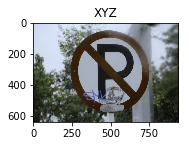

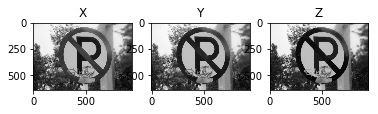

In [34]:
# Cambio a XYZ
imgxyz = cv2.cvtColor(imgrgb, 33)

plt.figure(3)
plt.subplot(221), plt.imshow(imgxyz, cmap=plt.cm.gray), plt.title('XYZ')

plt.figure(4)
plt.subplot(231), plt.imshow(imgxyz[:,:,0], cmap=plt.cm.gray), plt.title('X')
plt.subplot(232), plt.imshow(imgxyz[:,:,1], cmap=plt.cm.gray), plt.title('Y')
plt.subplot(233), plt.imshow(imgxyz[:,:,2], cmap=plt.cm.gray), plt.title('Z')

(<matplotlib.axes._subplots.AxesSubplot at 0x10cc7f290>,
 <matplotlib.text.Text at 0x10cedba90>)

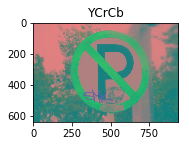

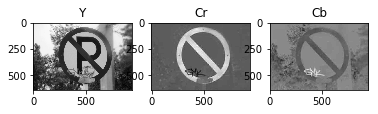

In [2]:
# Cambio a yCrCb
imgycrcb = cv2.cvtColor(imgrgb, 37)

plt.figure(3)
plt.subplot(221), plt.imshow(imgycrcb, cmap=plt.cm.gray), plt.title('YCrCb')

plt.figure(4)
plt.subplot(231), plt.imshow(imgycrcb[:,:,0], cmap=plt.cm.gray), plt.title('Y')
plt.subplot(232), plt.imshow(imgycrcb[:,:,1], cmap=plt.cm.gray), plt.title('Cr')
plt.subplot(233), plt.imshow(imgycrcb[:,:,2], cmap=plt.cm.gray), plt.title('Cb')

(<matplotlib.axes._subplots.AxesSubplot at 0x10d1c8fd0>,
 <matplotlib.text.Text at 0x10d4e0190>)

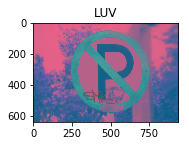

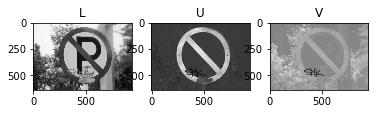

In [3]:
# Cambio a LUV

imgLUV = cv2.cvtColor(imgrgb, 51)


plt.figure(3)
plt.subplot(221), plt.imshow(imgLUV, cmap=plt.cm.gray), plt.title('LUV')

plt.figure(4)
plt.subplot(231), plt.imshow(imgLUV[:,:,0], cmap=plt.cm.gray), plt.title('L')
plt.subplot(232), plt.imshow(imgLUV[:,:,1], cmap=plt.cm.gray), plt.title('U')
plt.subplot(233), plt.imshow(imgLUV[:,:,2], cmap=plt.cm.gray), plt.title('V')

(<matplotlib.axes._subplots.AxesSubplot at 0x10e1ece90>,
 <matplotlib.text.Text at 0x10c371350>)

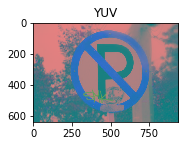

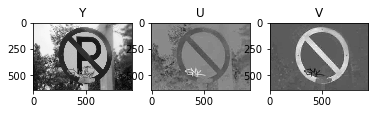

In [12]:
# Cambio a YUV

imgYUV = cv2.cvtColor(imgrgb, 83)


plt.figure(3)
plt.subplot(221), plt.imshow(imgYUV, cmap=plt.cm.gray), plt.title('YUV')

plt.figure(4)
plt.subplot(231), plt.imshow(imgYUV[:,:,0], cmap=plt.cm.gray), plt.title('Y')
plt.subplot(232), plt.imshow(imgYUV[:,:,1], cmap=plt.cm.gray), plt.title('U')
plt.subplot(233), plt.imshow(imgYUV[:,:,2], cmap=plt.cm.gray), plt.title('V')


<h2>Analisis </h2>
<p>Se puede ver que en los diferentes espacios de color se resaltan algunas caracteristicas que podriamos querer, como colores, textos, en concreto en las imagenes de las señal resalta el contorno que tiene color de la señal y el rayon que tiene esta</p>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;"> </h1>

<p>Implementar, como una función para OpenCV, las conversiones entre los espacios de color siguientes:</p>
  <li>RGB a LUX y su inversa.</li>
  <li>RGB a OHTA y su inversa.</li>
<p>evaluarlas en su proyecto o en aplicaciones a detección de rostros y de segmentación de productos, respectivamente.</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x10e72ffd0>,
 <matplotlib.text.Text at 0x10ecc02d0>)

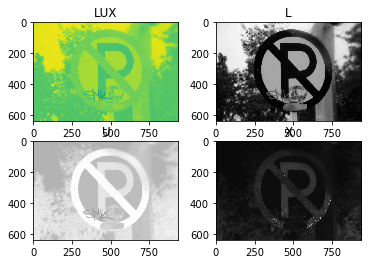

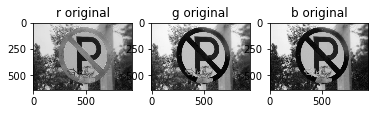

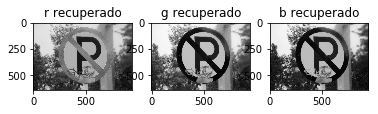

In [13]:
def RGBTLUX(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    L = np.zeros((width,height),np.uint8)
    U = np.zeros((width,height),np.uint8)
    X = np.zeros((width,height),np.uint8)
    L = (((red+1)**0.3)*((green+1)**0.6)*((blue+1)**0.6))-1

    if((L>=red).all()):
        U = 128*((red+1)/(L+1))
    else:
        U = 256 - 128*((L+1)/(red+1))
    
    if((L>=blue).all()):
        X = 128*((blue+1)/(L+1))
    else:
        X= 256 - 128*((L+1)/(blue+1))
   
    return L ,U , X

def LUXRGB(L,U,X):
    
    if (not U.all()<128):
        R=((U*(L+1))/128)-1
    else:
        R=((128)*(L+1)/(256-U))-1

    if (X.all() <128):
        B=((X*(L+1))/128)-1
    else:
        B=((128)*(L+1)/(256-X))-1

    G=((L+1) /((R+1)**(0.3) * (B+1)**(0.6)))**(5/3) -1
    return R,G,B


red = imgrgb[:,:,0]
green = imgrgb[:,:,1]
blue = imgrgb[:,:,2]

L, U , X = RGBTLUX(imgrgb)
nuevoR,nuevoG,nuevoB=LUXRGB(L,U,X)
plt.figure(1)
plt.subplot(221), plt.imshow(L+U+X), plt.title('LUX')
plt.subplot(222), plt.imshow(L, cmap=plt.cm.gray), plt.title('L')
plt.subplot(223), plt.imshow(U, cmap=plt.cm.gray), plt.title('U')
plt.subplot(224), plt.imshow(X, cmap=plt.cm.gray), plt.title('X')

plt.figure(2)
plt.subplot(131), plt.imshow(red, cmap=plt.cm.gray), plt.title('r original')
plt.subplot(132), plt.imshow(green, cmap=plt.cm.gray), plt.title('g original')
plt.subplot(133), plt.imshow(blue, cmap=plt.cm.gray), plt.title('b original')

plt.figure(3)
plt.subplot(131), plt.imshow(nuevoR, cmap=plt.cm.gray), plt.title('r recuperado')
plt.subplot(132), plt.imshow(nuevoG, cmap=plt.cm.gray), plt.title('g recuperado')
plt.subplot(133), plt.imshow(nuevoB, cmap=plt.cm.gray), plt.title('b recuperado')



        

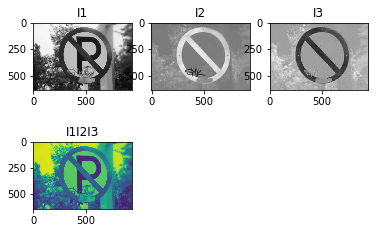

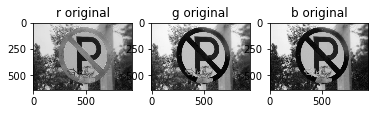

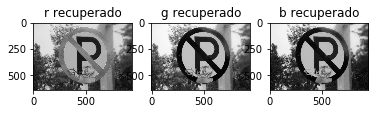

In [101]:
def RGBTOIII(img):
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,2]

    width, height = img.shape[:2]
    
    I1 = (1/3)*(np.float32(red)+np.float32(green)+np.float32(blue))
    I2 = (1/2)*(np.float32(red)-np.float32(blue))
    I3 = (1/4)*(2*np.float32(green)-np.float32(red)-np.float32(blue))
    return I1,I2,I3

def IIITORGB(I1,I2,I3, img):
    width, height = img.shape[:2]

    R = I1 + I2 -(2/3)* I3
    G = I1 + (4/3)* I3
    B = I1 - I2 -(2/3)*I3
    red = img[:,:,0]
    green = img[:,:,1]
    blue = img[:,:,1]
    return R,G,B

I1,I2,I3 = RGBTOIII(imgrgb)
R1,G1,B1 = IIITORGB(I1,I2,I3,imgrgb)

plt.figure(1)
plt.subplot(231), plt.imshow(I1,cmap=plt.cm.gray), plt.title('I1')
plt.subplot(232), plt.imshow(I2,cmap=plt.cm.gray), plt.title('I2')
plt.subplot(233), plt.imshow(I3, cmap=plt.cm.gray), plt.title('I3')
plt.subplot(234), plt.imshow(I1+I2+I3), plt.title('I1I2I3')
plt.show()

plt.figure(3)
plt.subplot(131), plt.imshow(imgrgb[:,:,0],cmap=plt.cm.gray), plt.title('r original')
plt.subplot(132), plt.imshow(imgrgb[:,:,1],cmap=plt.cm.gray), plt.title('g original')
plt.subplot(133), plt.imshow(imgrgb[:,:,2], cmap=plt.cm.gray), plt.title('b original')
plt.show()

plt.figure(2)
plt.subplot(131), plt.imshow(R1,cmap=plt.cm.gray), plt.title('r recuperado')
plt.subplot(132), plt.imshow(G1,cmap=plt.cm.gray), plt.title('g recuperado')
plt.subplot(133), plt.imshow(B1, cmap=plt.cm.gray), plt.title('b recuperado')
plt.show()


## Reconocer Color usando diferentes espacios
Se extrae el color del marco de la señal de transito usando diferentes espacios de color, para comparar.

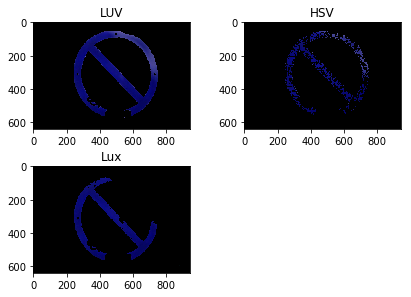

In [14]:
# Color rojo
lower_red = np.array([170])
upper_red = np.array([215])
mask = cv2.inRange(imgYUV[:,:,2], lower_red, upper_red)
res = cv2.bitwise_and(img,img, mask= mask)


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Color rojo
lower_red_hsv = np.array([0,100,100])
upper_red_hsv = np.array([0,255,255])
mask2 = cv2.inRange(hsv, lower_red_hsv, upper_red_hsv)
res2 = cv2.bitwise_and(img,img, mask= mask2)


l2,u2,x2 = RGBTLUX(imgrgb)
lower_red_lux = np.array([100])
upper_red_lux = np.array([255])
mask3 = cv2.inRange(u2, lower_red_lux, upper_red_lux)
res3 = cv2.bitwise_and(img,img, mask= mask3)

plt.figure(1)
plt.subplot(221), plt.imshow(res), plt.title('LUV')
plt.subplot(222), plt.imshow(res2), plt.title('HSV')
plt.subplot(223), plt.imshow(res3), plt.title('Lux')

plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()